In [15]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 



In [16]:
df = pd.read_csv("drug200.csv")


In [17]:
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [18]:
print("Column Names:", df.columns.tolist())

Column Names: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']


In [19]:
#split dataset in features and target variable
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']  
X = df[feature_cols]  
y = df['Drug'] 

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in ['Sex', 'BP', 'Cholesterol']:  
    encoder = LabelEncoder()  # Create a new encoder for each column
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


In [24]:
import numpy as np
print(np.unique(y_train))  # Check unique labels in y_train


['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [25]:
class_labels = list(map(str, np.unique(y_train)))  # Convert to string


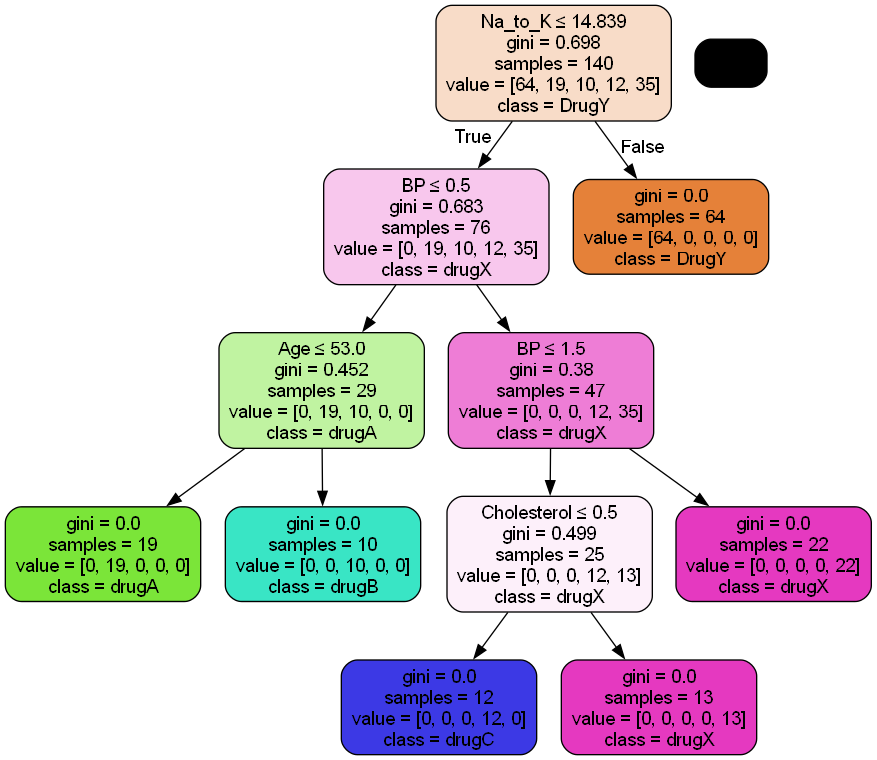

In [26]:
from sklearn.tree import export_graphviz
import io
from IPython.display import Image
import pydotplus

# Save the decision tree visualization as a PNG file
dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns,  # Use actual feature names
                class_names=class_labels)  # Dynamically set class names

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')  # Saves as 'decision_tree.png'
Image(graph.create_png())  # Displays the image in Jupyter Notebook


In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9
